In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [36]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [37]:
df=pd.read_csv('car data.csv')

In [38]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.870,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.830,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.120,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.610,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.890,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.920,42367,Diesel,Dealer,Manual,0


In [39]:
df.shape

(301, 9)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [41]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Exploartory Data Analysis (EDA)

In [42]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

C:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


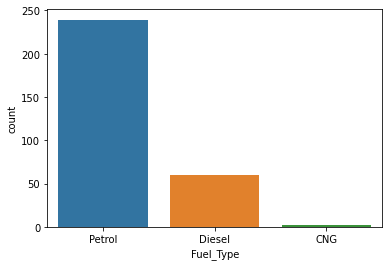

In [43]:
sns.countplot(df['Fuel_Type']);

In [44]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [45]:
df['Seller_Type'].unique()


array(['Dealer', 'Individual'], dtype=object)

In [46]:
df['Transmission'].unique()


array(['Manual', 'Automatic'], dtype=object)

In [47]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [48]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

C:\Users\meena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


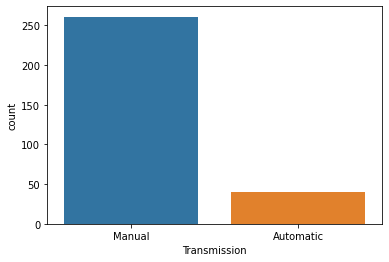

In [49]:
sns.countplot(df['Transmission']);

In [50]:
df.groupby(['Fuel_Type'])['Owner'].agg(['count'])

,count
Fuel_Type,
CNG,2
Diesel,60
Petrol,239


In [51]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [52]:
df[df['Fuel_Type']=='CNG']

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
18,wagon r,2015,3.25,5.09,35500,CNG,Dealer,Manual,0
35,sx4,2011,2.95,7.74,49998,CNG,Dealer,Manual,0


In [53]:
df[df['Owner']==3]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
85,camry,2006,2.5,23.73,142000,Petrol,Individual,Automatic,3


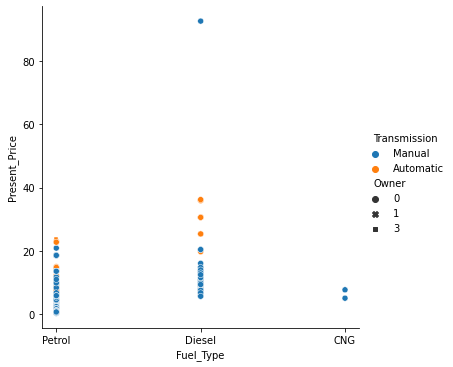

In [25]:
sns.relplot(x='Fuel_Type',y='Present_Price' ,hue='Transmission',style='Owner',data=df);

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df=sns.load_dataset('tips')

In [54]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.870,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.830,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.120,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.610,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.890,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.920,42367,Diesel,Dealer,Manual,0


In [ ]:
sns.scatter(x='Fuel_Type','')

In [191]:
df['Age']=2022-df['Year']
df.drop(columns=['Year'],inplace=True)

In [192]:
df

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,8
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,6
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,7
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,13
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,5


In [193]:
df['Age'].max()

19

In [194]:
df[df['Age']==19]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
37,800,0.35,2.28,127000,Petrol,Individual,Manual,0,19
39,sx4,2.25,7.98,62000,Petrol,Dealer,Manual,0,19


In [143]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [144]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [145]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [146]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [147]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

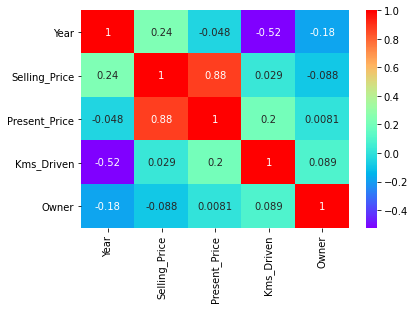

In [56]:
sns.heatmap(df.corr(),annot=True,cmap='rainbow');


In [149]:
df.drop(columns=['Car_Name'],inplace=True)

### One Hot Encoding

In [150]:
df=pd.get_dummies(df,columns=['Fuel_Type','Seller_Type','Transmission'])

In [151]:
df

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,8,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,9,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,5,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,11,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,8,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,6,0,1,0,1,0,0,1
297,4.00,5.90,60000,0,7,0,0,1,1,0,0,1
298,3.35,11.00,87934,0,13,0,0,1,1,0,0,1
299,11.50,12.50,9000,0,5,0,1,0,1,0,0,1


## Feature Selection

In [152]:
Y=df['Selling_Price']
X=df.drop(columns=['Selling_Price'])

In [196]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [197]:
X

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,5.59,27000,0,8,0,0,1,1,0,0,1
1,9.54,43000,0,9,0,1,0,1,0,0,1
2,9.85,6900,0,5,0,0,1,1,0,0,1
3,4.15,5200,0,11,0,0,1,1,0,0,1
4,6.87,42450,0,8,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
296,11.60,33988,0,6,0,1,0,1,0,0,1
297,5.90,60000,0,7,0,0,1,1,0,0,1
298,11.00,87934,0,13,0,0,1,1,0,0,1
299,12.50,9000,0,5,0,1,0,1,0,0,1


In [153]:
df.skew(axis=0)

Selling_Price              2.493422
Present_Price              4.083150
Kms_Driven                 6.436013
Owner                      7.616850
Age                        1.246189
Fuel_Type_CNG             12.206146
Fuel_Type_Diesel           1.512750
Fuel_Type_Petrol          -1.461340
Seller_Type_Dealer        -0.622146
Seller_Type_Individual     0.622146
Transmission_Automatic     2.173776
Transmission_Manual       -2.173776
dtype: float64

In [154]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


In [155]:
a=pd.DataFrame(X_scaled)
a.skew(axis=0)

0      4.083150
1      6.436013
2      7.616850
3      1.246189
4     12.206146
5      1.512750
6     -1.461340
7     -0.622146
8      0.622146
9      2.173776
10    -2.173776
dtype: float64

In [156]:
X_scaled.skew()

AttributeError: 'numpy.ndarray' object has no attribute 'skew'

In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=1)

In [124]:
regression = LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [125]:
regression.score(X_train,Y_train)

0.8822783397439671

In [126]:
regression.score(X_test,Y_test)

0.8625260513315233

In [198]:
regression.coef_

array([ 3.77321748, -0.20599619,  0.08561437, -1.19300617, -0.10618412,
        0.36894217, -0.34312693,  0.28880184, -0.28880184,  0.31741587,
       -0.31741587])

In [199]:
regression.intercept_

4.7028424985602

In [201]:
X_test

array([[ 0.1009912 , -0.56380594, -0.17450057, -0.8217184 , -0.08178608,
        -0.49896158,  0.50932723,  0.73728539, -0.73728539,  2.55440795,
        -2.55440795],
       [-0.35093412, -0.17894916, -0.17450057,  0.21751369, -0.08178608,
        -0.49896158,  0.50932723,  0.73728539, -0.73728539, -0.39148015,
         0.39148015],
       [-0.78825877, -0.7971516 , -0.17450057,  0.91033509, -0.08178608,
        -0.49896158,  0.50932723, -1.35632689,  1.35632689, -0.39148015,
         0.39148015],
       [-0.37063343, -0.56532568, -0.17450057, -0.8217184 , -0.08178608,
        -0.49896158,  0.50932723,  0.73728539, -0.73728539, -0.39148015,
         0.39148015],
       [-0.71015681, -0.56532568, -0.17450057,  0.21751369, -0.08178608,
        -0.49896158,  0.50932723, -1.35632689,  1.35632689, -0.39148015,
         0.39148015],
       [-0.05776205, -0.6302627 , -0.17450057, -1.16812909, -0.08178608,
        -0.49896158,  0.50932723,  0.73728539, -0.73728539, -0.39148015,
         0.391

In [127]:
y_pred=regression.predict(X_test)
y_pred

array([ 7.86273200e+00,  2.96828691e+00, -5.90305107e-01,  4.21335952e+00,
        4.83175534e-01,  5.82053813e+00,  1.95679784e+00,  2.55809661e+00,
        7.70870833e+00,  9.78692192e-01,  8.13484343e+00,  3.51207180e+00,
        4.90669281e+00,  4.63905587e+00, -2.15886643e+00,  3.13874624e+00,
        7.98256903e+00,  6.75937638e+00,  6.90426580e+00,  8.01440587e+00,
        4.31168610e+00,  4.00336757e+00,  1.13040883e+01,  8.07939189e+00,
        9.54399823e+00,  3.52133877e+00,  3.80609808e+00,  1.06074722e+00,
       -6.01732475e-01, -6.19712043e-01,  1.32818516e-03, -1.28500691e+00,
        4.28533553e+00,  2.06769487e+01,  1.87563232e+01,  4.27292100e+00,
        3.48602852e+00,  1.66739677e+00, -4.38707073e-02,  5.78536030e+00,
        8.03940428e+00,  9.88367483e+00,  4.09684249e-01,  6.07997517e+00,
        5.88038915e+00,  4.32745252e+00,  7.37534505e+00,  5.86171335e+00,
        8.21129880e+00,  1.65455816e+00,  3.83033706e+00,  1.75047060e+00,
        2.51406796e+00,  

In [60]:
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error

In [67]:
mean_squared_error(Y_test,y_pred)

2.982384861859792

In [68]:
rmse=0.5**mean_squared_error(Y_test,y_pred)
rmse

1.491192430929896

In [69]:
 mean_absolute_error(Y_test, y_pred)


1.0998575552990966

In [70]:
mean_absolute_percentage_error(Y_test, y_pred)


1.270292454351239